In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
kolaci = pd.read_excel("kolaci.xlsx")
sportasi = pd.read_excel("sportasi_zscore.xlsx")
stanovi = pd.read_excel("stanovi_zagreb.xlsx")


In [3]:
sportasi

,Age,Height
0,41,185
1,29,180
2,34,175
3,48,160
4,32,192
...,...,...
194,35,176
195,44,190
196,32,188
197,18,184


In [4]:
sportasi.isnull().sum()

Age       0
Height    0
dtype: int64

In [5]:
sportasi.describe()

,Age,Height
count,199.000000,199.000000
mean,41.206030,186.417085
std,15.411289,10.077072
min,-27.000000,150.000000
25%,32.000000,181.000000
50%,41.000000,187.000000
75%,51.000000,192.000000
max,147.000000,228.000000


In [7]:
### outlieri na Age (min i max), mogući outlieri na height (min i max)

Text(0.5, 1.0, 'Distribucija starosti')

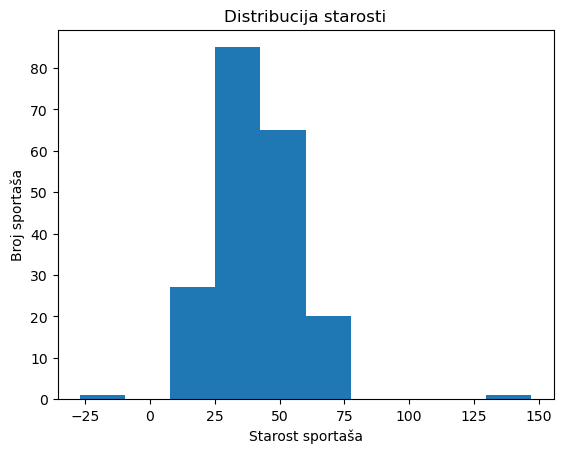

In [8]:
plt.hist (sportasi.Age)
plt.xlabel ("Starost sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija starosti")

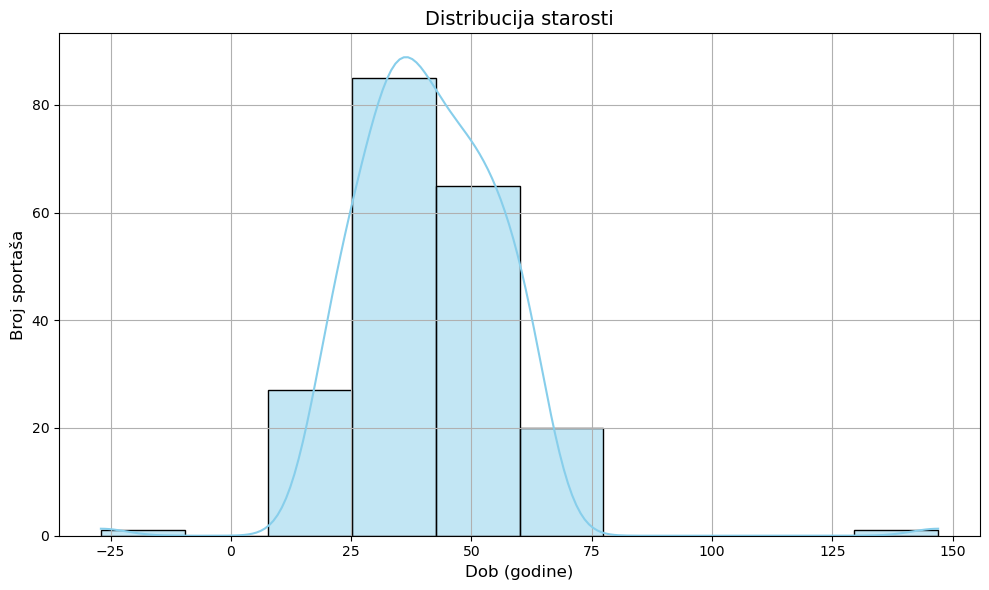

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(sportasi["Age"], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribucija starosti", fontsize=14)
plt.xlabel("Dob (godine)", fontsize=12)
plt.ylabel("Broj sportaša", fontsize=12)
plt.grid(True)
plt.tight_layout()

In [12]:
### sns.histplot(sportasi["Age"], bins=10, kde=True, color='skyblue', edgecolor='black')
### ****kde=True - crta liniju distribucije

<Axes: xlabel='Age'>

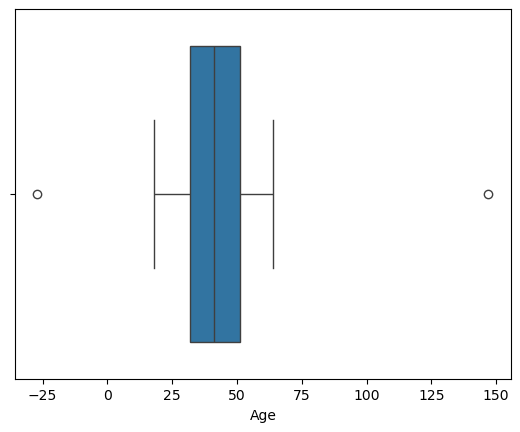

In [13]:
sns.boxplot (x = sportasi["Age"])

Text(0.5, 1.0, 'Distribucija visine')

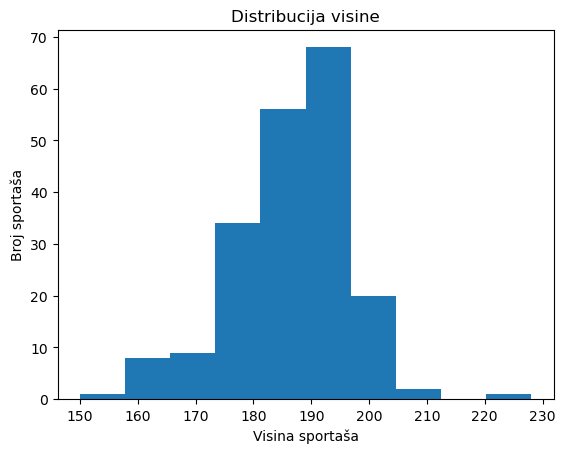

In [14]:
plt.hist (sportasi.Height)
plt.xlabel ("Visina sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija visine")

<Axes: xlabel='Height'>

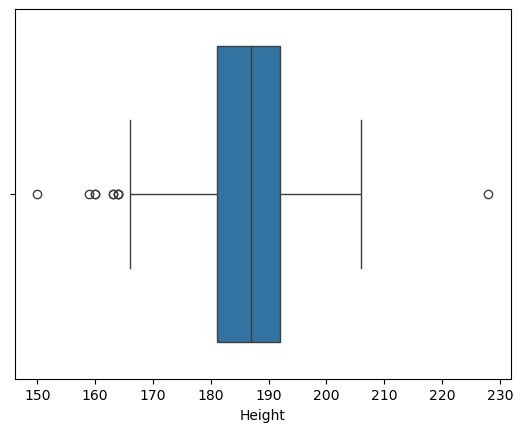

In [15]:
sns.boxplot (x = sportasi["Height"])

In [ ]:
### ekstremno visoka osoba i nekoliko ekstrmno niskih u odnosu na date podatke

In [16]:
sportasi2 = sportasi.copy()

In [17]:
sportasi2

,Age,Height
0,41,185
1,29,180
2,34,175
3,48,160
4,32,192
...,...,...
194,35,176
195,44,190
196,32,188
197,18,184


In [24]:
sportasi2.sort_values (by = ["Age"])

,Age,Height
75,-27,181
114,18,184
197,18,184
31,19,187
104,19,167
...,...,...
119,64,187
41,64,186
151,64,191
176,64,191


In [ ]:
### ekstremi -27 i 147

In [ ]:
###### 1. Metoda: brisanje podataka (samo u iznimnim situacijama npr kada imamo jako puno podataka)

In [25]:
sportasi2 = sportasi2.drop (labels = [75, 135], axis = 0)

In [26]:
sportasi2.describe()


,Age,Height
count,197.000000,197.000000
mean,41.015228,186.467005
std,12.611736,10.115919
min,18.000000,150.000000
25%,32.000000,181.000000
50%,41.000000,187.000000
75%,51.000000,192.000000
max,64.000000,228.000000


In [27]:
sportasi2.sort_values (by = ["Age"])

,Age,Height
114,18,184
197,18,184
104,19,167
31,19,187
101,19,183
...,...,...
141,63,185
41,64,186
119,64,187
151,64,191


In [ ]:
### izbrisani su ekstremi

In [ ]:
###### 2. Metoda imputacije: zamjena drugom vrijednšću

In [28]:
sportasi3 = sportasi.copy()
sportasi3

,Age,Height
0,41,185
1,29,180
2,34,175
3,48,160
4,32,192
...,...,...
194,35,176
195,44,190
196,32,188
197,18,184


In [29]:
sportasi3.describe()

,Age,Height
count,199.000000,199.000000
mean,41.206030,186.417085
std,15.411289,10.077072
min,-27.000000,150.000000
25%,32.000000,181.000000
50%,41.000000,187.000000
75%,51.000000,192.000000
max,147.000000,228.000000


In [30]:
sportasi3.sort_values (by = ["Age"])

,Age,Height
75,-27,181
114,18,184
197,18,184
31,19,187
104,19,167
...,...,...
119,64,187
41,64,186
151,64,191
176,64,191


In [34]:
outlier_index = [75,135]
mean_non_outliers = sportasi3.drop(outlier_index)["Age"].mean()
mean_non_outliers

np.float64(41.015228426395936)

In [ ]:
### naredba loc - na mjesto outlier_index ubacujemo mean_non_outliers

In [36]:
sportasi3.loc[outlier_index, "Age"] = int(mean_non_outliers)

In [38]:
sportasi3.sort_values (by = ["Age"])

,Age,Height
114,18.0,184
197,18.0,184
101,19.0,183
31,19.0,187
104,19.0,167
...,...,...
42,63.0,171
41,64.0,186
119,64.0,187
151,64.0,191


In [44]:
sportasi3.loc [[75, 135]]

,Age,Height
75,41.0,181
135,41.0,182


In [45]:
### Baziramo se na varijablu visina

In [50]:
### za ovu metodu bitno je da imamo normalnu razdiobu

Text(0.5, 1.0, 'Distribucija visine')

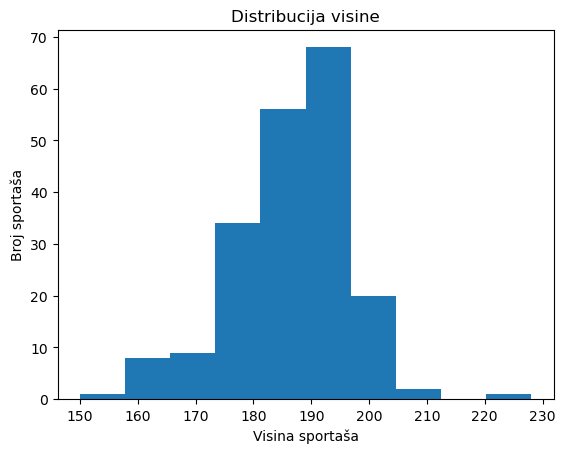

In [46]:
plt.hist (sportasi.Height)
plt.xlabel ("Visina sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija visine")

In [48]:
sportasi4 = sportasi.copy()

In [49]:
sportasi4.sort_values (by = ["Height"])

,Age,Height
118,46,150
60,62,159
3,48,160
161,45,160
21,37,163
...,...,...
128,30,203
77,47,204
188,62,205
72,57,206


In [51]:
### Z-score
### trashhold = 3

In [53]:
sportasi4["zscore"] = stats.zscore(sportasi4["Height"])
sportasi4

,Age,Height,zscore
0,41,185,-0.140979
1,29,180,-0.638407
2,34,175,-1.135834
3,48,160,-2.628116
4,32,192,0.555419
...,...,...,...
194,35,176,-1.036348
195,44,190,0.356448
196,32,188,0.157477
197,18,184,-0.240465


In [54]:
threshold = 3

In [56]:
outliers = sportasi4[sportasi4['zscore'].abs() > threshold]['Height'].tolist()
outliers

[150, 228]

In [59]:
mean_without_outliers = sportasi4[sportasi4['zscore'].abs() <= threshold]['Height'].mean()
mean_without_outliers

np.float64(186.39086294416245)

In [60]:
sportasi4.loc[sportasi4['Height'].isin(outliers), 'Height'] = int(mean_without_outliers)
sportasi4

,Age,Height,zscore
0,41,185,-0.140979
1,29,180,-0.638407
2,34,175,-1.135834
3,48,160,-2.628116
4,32,192,0.555419
...,...,...,...
194,35,176,-1.036348
195,44,190,0.356448
196,32,188,0.157477
197,18,184,-0.240465


In [61]:
sportasi4.describe()

,Age,Height,zscore
count,199.000000,199.000000,1.990000e+02
mean,41.206030,186.386935,3.838359e-16
std,15.411289,9.279935,1.002522e+00
min,-27.000000,159.000000,-3.622970e+00
25%,32.000000,181.000000,-5.389212e-01
50%,41.000000,187.000000,5.799152e-02
75%,51.000000,192.000000,5.554188e-01
max,147.000000,206.000000,4.136895e+00


Text(0.5, 1.0, 'Distribucija visine')

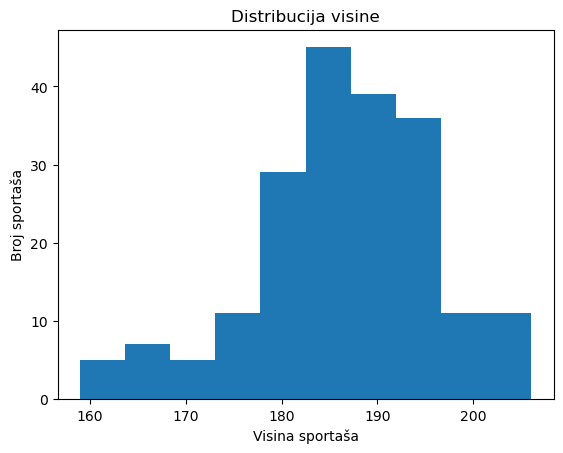

In [62]:
plt.hist (sportasi4.Height)
plt.xlabel ("Visina sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija visine")

In [64]:
### ako distribucija nije normalna (nakrivljena je)
### 4. IQR metoda - interQuartil range metoda

In [65]:
data = {
    'Height': [150, 155, 160, 162, 164, 170, 175, 180, 400, 185, 190, 500, 195]
}

In [66]:
sportasi5 = pd.DataFrame(data)
sportasi5

,Height
0,150
1,155
2,160
3,162
4,164
5,170
6,175
7,180
8,400
9,185


(array([8., 3., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([150., 185., 220., 255., 290., 325., 360., 395., 430., 465., 500.]),
 <BarContainer object of 10 artists>)

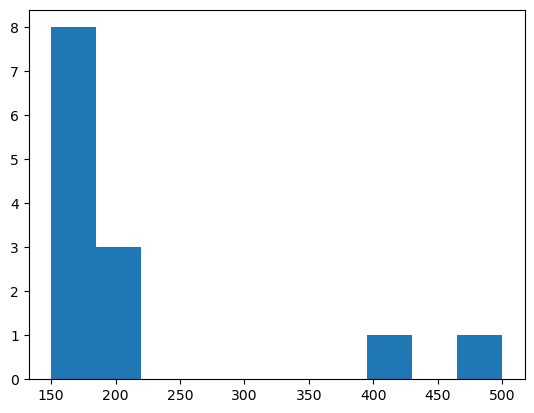

In [68]:
plt.hist (sportasi5.Height)

<Axes: xlabel='Height'>

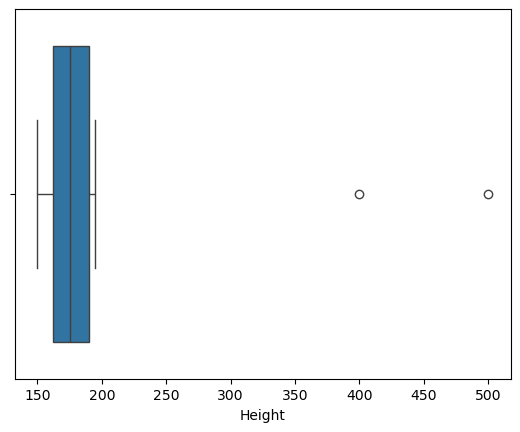

In [69]:
sns.boxplot (x = sportasi5["Height"])

In [73]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = sportasi5['Height'].quantile(0.25)
Q3 = sportasi5['Height'].quantile(0.75)

#Raspon
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR






In [74]:
outliers2 = sportasi5[(sportasi5['Height'] < lower_bound) | (sportasi5['Height'] > upper_bound)]['Height'].tolist()
outliers2

[400, 500]